In [8]:
from nba_api.stats.endpoints import commonplayerinfo


https://github.com/swar/nba_api/blob/master/docs/examples/Finding%20Games.ipynb

In [7]:
!python3.9 -m pip install nba_api


  Using cached nba_api-1.1.9-py3-none-any.whl (242 kB)
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
import pandas as pd

In [11]:
player_info = commonplayerinfo.CommonPlayerInfo(player_id=2544)


In [13]:
custom_headers = {
    'Host': 'stats.nba.com',
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

# Only available after v1.1.0
# Proxy Support, Custom Headers Support, Timeout Support (in seconds)
player_info = commonplayerinfo.CommonPlayerInfo(player_id=2544, headers=custom_headers, timeout=100)


KeyboardInterrupt: 

In [ ]:
#player_info

In [22]:
player_info.available_seasons.get_data_frame().values


array([['12003'],
       ['22003'],
       ['12004'],
       ['22004'],
       ['32004'],
       ['12005'],
       ['22005'],
       ['32005'],
       ['42005'],
       ['12006'],
       ['22006'],
       ['32006'],
       ['42006'],
       ['12007'],
       ['22007'],
       ['32007'],
       ['42007'],
       ['12008'],
       ['22008'],
       ['32008'],
       ['42008'],
       ['12009'],
       ['22009'],
       ['32009'],
       ['42009'],
       ['12010'],
       ['22010'],
       ['32010'],
       ['42010'],
       ['12011'],
       ['22011'],
       ['32011'],
       ['42011'],
       ['12012'],
       ['22012'],
       ['32012'],
       ['42012'],
       ['12013'],
       ['22013'],
       ['32013'],
       ['42013'],
       ['12014'],
       ['22014'],
       ['32014'],
       ['42014'],
       ['12015'],
       ['22015'],
       ['32015'],
       ['42015'],
       ['12016'],
       ['22016'],
       ['32016'],
       ['42016'],
       ['12017'],
       ['22017'],
       ['3

In [16]:
player_info.common_player_info.get_data_frame().T

,0
PERSON_ID,2544
FIRST_NAME,LeBron
LAST_NAME,James
DISPLAY_FIRST_LAST,LeBron James
DISPLAY_LAST_COMMA_FIRST,"James, LeBron"
DISPLAY_FI_LAST,L. James
PLAYER_SLUG,lebron-james
BIRTHDATE,1984-12-30T00:00:00
SCHOOL,St. Vincent-St. Mary HS (OH)
COUNTRY,USA


In [18]:
player_info.player_headline_stats.get_data_frame().T

,0
PLAYER_ID,2544
PLAYER_NAME,LeBron James
TimeFrame,2020-21
PTS,25.0
AST,7.8
REB,7.7
PIE,0.191


In [21]:
player_info.data_sets[0]

In [23]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
nuggets = [team for team in nba_teams if team['abbreviation'] == 'DEN'][0]
nuggets_id = nuggets['id']

In [25]:
nuggets_id

1610612743

In [36]:
from nba_api.stats.endpoints import leaguegamefinder

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=nuggets_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612743,DEN,Denver Nuggets,0042000163,2021-05-27,DEN @ POR,W,239,120,...,0.815,12,33,45,24,4,4,13,18,5.0
1,42020,1610612743,DEN,Denver Nuggets,0042000162,2021-05-24,DEN vs. POR,W,240,128,...,0.800,10,25,35,29,12,3,12,25,19.0
2,42020,1610612743,DEN,Denver Nuggets,0042000161,2021-05-22,DEN vs. POR,L,240,109,...,0.500,11,37,48,22,3,7,8,18,-14.0
3,22020,1610612743,DEN,Denver Nuggets,0022001076,2021-05-16,DEN @ POR,L,240,116,...,0.933,10,26,36,20,8,2,6,20,-16.0
4,22020,1610612743,DEN,Denver Nuggets,0022001054,2021-05-14,DEN @ DET,W,240,104,...,0.786,9,40,49,29,6,3,11,17,13.0


In [27]:
games.shape

(3386, 28)

In [32]:
games.loc[games['SEASON_ID'].str.contains('2020')]

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612743,DEN,Denver Nuggets,0042000163,2021-05-27,DEN @ POR,W,239,120,...,0.815,12,33,45,24,4,4,13,18,5.0
1,42020,1610612743,DEN,Denver Nuggets,0042000162,2021-05-24,DEN vs. POR,W,240,128,...,0.800,10,25,35,29,12,3,12,25,19.0
2,42020,1610612743,DEN,Denver Nuggets,0042000161,2021-05-22,DEN vs. POR,L,240,109,...,0.500,11,37,48,22,3,7,8,18,-14.0
3,22020,1610612743,DEN,Denver Nuggets,0022001076,2021-05-16,DEN @ POR,L,240,116,...,0.933,10,26,36,20,8,2,6,20,-16.0
4,22020,1610612743,DEN,Denver Nuggets,0022001054,2021-05-14,DEN @ DET,W,240,104,...,0.786,9,40,49,29,6,3,11,17,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,22020,1610612743,DEN,Denver Nuggets,0022000009,2020-12-25,DEN vs. LAC,L,238,108,...,0.742,10,22,32,25,7,1,13,20,-13.0
74,22020,1610612743,DEN,Denver Nuggets,0022000019,2020-12-23,DEN vs. SAC,L,265,122,...,0.833,10,36,46,28,6,11,15,25,-2.0
75,12020,1610612743,DEN,Denver Nuggets,0012000045,2020-12-18,DEN vs. POR,W,240,129,...,0.778,17,36,53,30,11,8,12,23,33.0
76,12020,1610612743,DEN,Denver Nuggets,0012000030,2020-12-16,DEN vs. POR,W,241,126,...,0.739,11,44,55,39,6,9,23,22,31.0


In [33]:
games.groupby(games.SEASON_ID.str[-4:])[['GAME_ID']].count().loc['2015':]


,GAME_ID
SEASON_ID,
2015,94
2016,95
2017,93
2018,106
2019,103
2020,78


In [37]:

# Subset the games to when the last 4 digits of SEASON_ID were 2017.
games2020 = games[games.SEASON_ID.str[-4:] == '2020']
games2020.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612743,DEN,Denver Nuggets,0042000163,2021-05-27,DEN @ POR,W,239,120,...,0.815,12,33,45,24,4,4,13,18,5.0
1,42020,1610612743,DEN,Denver Nuggets,0042000162,2021-05-24,DEN vs. POR,W,240,128,...,0.800,10,25,35,29,12,3,12,25,19.0
2,42020,1610612743,DEN,Denver Nuggets,0042000161,2021-05-22,DEN vs. POR,L,240,109,...,0.500,11,37,48,22,3,7,8,18,-14.0
3,22020,1610612743,DEN,Denver Nuggets,0022001076,2021-05-16,DEN @ POR,L,240,116,...,0.933,10,26,36,20,8,2,6,20,-16.0
4,22020,1610612743,DEN,Denver Nuggets,0022001054,2021-05-14,DEN @ DET,W,240,104,...,0.786,9,40,49,29,6,3,11,17,13.0


In [38]:
games2020

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612743,DEN,Denver Nuggets,0042000163,2021-05-27,DEN @ POR,W,239,120,...,0.815,12,33,45,24,4,4,13,18,5.0
1,42020,1610612743,DEN,Denver Nuggets,0042000162,2021-05-24,DEN vs. POR,W,240,128,...,0.800,10,25,35,29,12,3,12,25,19.0
2,42020,1610612743,DEN,Denver Nuggets,0042000161,2021-05-22,DEN vs. POR,L,240,109,...,0.500,11,37,48,22,3,7,8,18,-14.0
3,22020,1610612743,DEN,Denver Nuggets,0022001076,2021-05-16,DEN @ POR,L,240,116,...,0.933,10,26,36,20,8,2,6,20,-16.0
4,22020,1610612743,DEN,Denver Nuggets,0022001054,2021-05-14,DEN @ DET,W,240,104,...,0.786,9,40,49,29,6,3,11,17,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,22020,1610612743,DEN,Denver Nuggets,0022000009,2020-12-25,DEN vs. LAC,L,238,108,...,0.742,10,22,32,25,7,1,13,20,-13.0
74,22020,1610612743,DEN,Denver Nuggets,0022000019,2020-12-23,DEN vs. SAC,L,265,122,...,0.833,10,36,46,28,6,11,15,25,-2.0
75,12020,1610612743,DEN,Denver Nuggets,0012000045,2020-12-18,DEN vs. POR,W,240,129,...,0.778,17,36,53,30,11,8,12,23,33.0
76,12020,1610612743,DEN,Denver Nuggets,0012000030,2020-12-16,DEN vs. POR,W,241,126,...,0.739,11,44,55,39,6,9,23,22,31.0


In [39]:
games2020[games2020.MATCHUP.str.contains('POR')]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612743,DEN,Denver Nuggets,0042000163,2021-05-27,DEN @ POR,W,239,120,...,0.815,12,33,45,24,4,4,13,18,5.0
1,42020,1610612743,DEN,Denver Nuggets,0042000162,2021-05-24,DEN vs. POR,W,240,128,...,0.800,10,25,35,29,12,3,12,25,19.0
2,42020,1610612743,DEN,Denver Nuggets,0042000161,2021-05-22,DEN vs. POR,L,240,109,...,0.500,11,37,48,22,3,7,8,18,-14.0
3,22020,1610612743,DEN,Denver Nuggets,0022001076,2021-05-16,DEN @ POR,L,240,116,...,0.933,10,26,36,20,8,2,6,20,-16.0
17,22020,1610612743,DEN,Denver Nuggets,0022000890,2021-04-21,DEN @ POR,W,239,106,...,0.882,16,30,46,24,7,5,13,16,1.0
44,22020,1610612743,DEN,Denver Nuggets,0022000487,2021-02-23,DEN vs. POR,W,241,111,...,0.944,10,30,40,25,8,3,1,10,5.0
75,12020,1610612743,DEN,Denver Nuggets,0012000045,2020-12-18,DEN vs. POR,W,240,129,...,0.778,17,36,53,30,11,8,12,23,33.0
76,12020,1610612743,DEN,Denver Nuggets,0012000030,2020-12-16,DEN vs. POR,W,241,126,...,0.739,11,44,55,39,6,9,23,22,31.0


In [41]:
games2020.loc[games2020.MATCHUP.str.contains('POR'),'WL'].value_counts()

W    6
L    2
Name: WL, dtype: int64

In [43]:
matches = games2020.loc[games2020.MATCHUP.str.contains('POR'),:]

In [45]:
matches.T

,0,1,2,3,17,44,75,76
SEASON_ID,42020,42020,42020,22020,22020,22020,12020,12020
TEAM_ID,1610612743,1610612743,1610612743,1610612743,1610612743,1610612743,1610612743,1610612743
TEAM_ABBREVIATION,DEN,DEN,DEN,DEN,DEN,DEN,DEN,DEN
TEAM_NAME,Denver Nuggets,Denver Nuggets,Denver Nuggets,Denver Nuggets,Denver Nuggets,Denver Nuggets,Denver Nuggets,Denver Nuggets
GAME_ID,0042000163,0042000162,0042000161,0022001076,0022000890,0022000487,0012000045,0012000030
GAME_DATE,2021-05-27,2021-05-24,2021-05-22,2021-05-16,2021-04-21,2021-02-23,2020-12-18,2020-12-16
MATCHUP,DEN @ POR,DEN vs. POR,DEN vs. POR,DEN @ POR,DEN @ POR,DEN vs. POR,DEN vs. POR,DEN vs. POR
WL,W,W,L,L,W,W,W,W
MIN,239,240,240,240,239,241,240,241
PTS,120,128,109,116,106,111,129,126


In [67]:
m = matches[['GAME_DATE','FG_PCT','FG3_PCT','FG3A','PLUS_MINUS', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
m

,GAME_DATE,FG_PCT,FG3_PCT,FG3A,PLUS_MINUS,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2021-05-27,0.464,0.526,38,5.0,12,33,45,24,4,4,13,18
1,2021-05-24,0.535,0.429,28,19.0,10,25,35,29,12,3,12,25
2,2021-05-22,0.505,0.306,36,-14.0,11,37,48,22,3,7,8,18
3,2021-05-16,0.449,0.378,37,-16.0,10,26,36,20,8,2,6,20
17,2021-04-21,0.443,0.333,39,1.0,16,30,46,24,7,5,13,16
44,2021-02-23,0.426,0.389,36,5.0,10,30,40,25,8,3,1,10
75,2020-12-18,0.474,0.409,44,33.0,17,36,53,30,11,8,12,23
76,2020-12-16,0.523,0.413,46,31.0,11,44,55,39,6,9,23,22


In [65]:
matches.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [68]:
import matplotlib.pyplot as plt

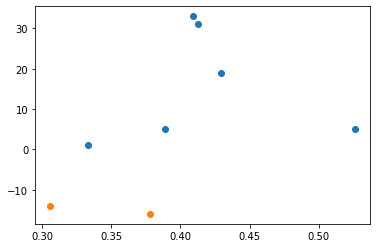

In [77]:
plt.scatter(matches.loc[matches['WL']=='W','FG3_PCT'], matches.loc[matches['WL']=='W','PLUS_MINUS'])
plt.scatter(matches.loc[matches['WL']=='L','FG3_PCT'], matches.loc[matches['WL']=='L','PLUS_MINUS'])

In [ ]:
playerdashboardbygamesplits

In [79]:
from nba_api.stats.endpoints import playbyplayv2
pbp = playbyplayv2.PlayByPlayV2('0042000163')
pbp = pbp.get_data_frames()[0]
pbp.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0042000163,2,12,0,1,10:41 PM,12:00,None,Start of 1st Period (10:41 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,0
1,0042000163,4,10,0,1,10:41 PM,12:00,Jump Ball Nurkic vs. Jokic: Tip to Campazzo,None,None,...,Nuggets,DEN,5,1630267,Facundo Campazzo,1.610613e+09,Denver,Nuggets,DEN,1
2,0042000163,7,1,78,1,10:42 PM,11:37,None,None,Porter Jr. 19' Floating Jump Shot (2 PTS) (Jok...,...,Nuggets,DEN,0,0,None,NaN,None,None,None,1
3,0042000163,9,1,101,1,10:42 PM,11:20,McCollum 6' Driving Floating Jump Shot (2 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
4,0042000163,10,2,47,1,10:42 PM,10:55,None,None,MISS Gordon 4' Turnaround Jump Shot,...,None,None,0,0,None,NaN,None,None,None,1


In [80]:
df = pbp

In [160]:
df['EVENTMSGTYPE'].value_counts()

4     107
2     100
1      84
8      46
6      43
3      40
5      21
9      13
12      4
13      4
7       3
10      3
18      2
Name: EVENTMSGTYPE, dtype: int64

In [81]:
df.sort_values('EVENTNUM')

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0042000163,2,12,0,1,10:41 PM,12:00,None,Start of 1st Period (10:41 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,0
1,0042000163,4,10,0,1,10:41 PM,12:00,Jump Ball Nurkic vs. Jokic: Tip to Campazzo,None,None,...,Nuggets,DEN,5,1630267,Facundo Campazzo,1.610613e+09,Denver,Nuggets,DEN,1
2,0042000163,7,1,78,1,10:42 PM,11:37,None,None,Porter Jr. 19' Floating Jump Shot (2 PTS) (Jok...,...,Nuggets,DEN,0,0,None,NaN,None,None,None,1
3,0042000163,9,1,101,1,10:42 PM,11:20,McCollum 6' Driving Floating Jump Shot (2 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
4,0042000163,10,2,47,1,10:42 PM,10:55,None,None,MISS Gordon 4' Turnaround Jump Shot,...,None,None,0,0,None,NaN,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0042000163,663,2,79,4,1:09 AM,0:00,MISS Lillard 66' 3PT Pullup Jump Shot,None,None,...,None,None,0,0,None,NaN,None,None,None,1
468,0042000163,664,4,0,4,1:09 AM,0:00,TRAIL BLAZERS Rebound,None,None,...,None,None,0,0,None,NaN,None,None,None,0
469,0042000163,665,13,0,4,1:09 AM,0:00,None,End of 4th Period (1:09 AM EST),None,...,None,None,0,0,None,NaN,None,None,None,1
462,0042000163,667,2,97,4,1:09 AM,0:03,None,None,MISS Jokic 1' Tip Layup Shot,...,None,None,0,0,None,NaN,None,None,None,0


In [82]:
df.columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

In [124]:
df[['HOMEDESCRIPTION','NEUTRALDESCRIPTION','VISITORDESCRIPTION']]

,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION
0,,Start of 1st Period (10:41 PM EST),
1,Jump Ball Nurkic vs. Jokic: Tip to Campazzo,None,
2,,None,Porter Jr. 19' Floating Jump Shot (2 PTS) (Jok...
3,McCollum 6' Driving Floating Jump Shot (2 PTS),None,
4,,None,MISS Gordon 4' Turnaround Jump Shot
...,...,...,...
465,,None,Jokic REBOUND (Off:6 Def:5)
466,,None,Jokic Tip Layup Shot (36 PTS)
467,MISS Lillard 66' 3PT Pullup Jump Shot,None,
468,TRAIL BLAZERS Rebound,None,


In [105]:
df['NEUTRALDESCRIPTION'].value_counts()

Start of 3rd Period (11:54 PM EST)         1
End of 1st Period (11:07 PM EST)           1
End of 4th Period (1:09 AM EST)            1
End of 2nd Period (11:38 PM EST)           1
Instant Replay3rd Period (12:22 AM EST)    1
Instant Replay3rd Period (12:06 AM EST)    1
Start of 4th Period (12:31 AM EST)         1
End of 3rd Period (12:28 AM EST)           1
Start of 1st Period (10:41 PM EST)         1
Start of 2nd Period (11:11 PM EST)         1
Name: NEUTRALDESCRIPTION, dtype: int64

In [122]:
df['HOMEDESCRIPTION'] = df['HOMEDESCRIPTION'].apply(lambda x: "" if (x is None) else x)
df['VISITORDESCRIPTION'] = df['VISITORDESCRIPTION'].apply(lambda x: "" if (x is None) else x)

In [132]:
df.loc[(df['HOMEDESCRIPTION'] != "") & (df['VISITORDESCRIPTION'] != ""), ['HOMEDESCRIPTION','VISITORDESCRIPTION']]

,HOMEDESCRIPTION,VISITORDESCRIPTION
16,Powell STEAL (1 STL),Porter Jr. Lost Ball Turnover (P1.T1)
31,Lillard STEAL (1 STL),Jokic Bad Pass Turnover (P1.T3)
44,Nurkic BLOCK (1 BLK),MISS Gordon 2' Driving Layup
66,Lillard Bad Pass Turnover (P1.T2),Morris STEAL (1 STL)
71,Lillard STEAL (2 STL),Campazzo Bad Pass Turnover (P1.T4)
86,MISS Lillard 3' Driving Layup,Harrison BLOCK (1 BLK)
112,MISS McCollum 26' 3PT Jump Shot,Harrison BLOCK (2 BLK)
145,McCollum STEAL (1 STL),Millsap Bad Pass Turnover (P1.T6)
154,Powell BLOCK (1 BLK),MISS Porter Jr. 4' Driving Hook Shot
166,McCollum Bad Pass Turnover (P1.T3),Porter Jr. STEAL (1 STL)


In [134]:
df.apply(lambda x: x['HOMEDESCRIPTION'] + "; " + x['VISITORDESCRIPTION'], axis=1)

0                                                     ; 
1          Jump Ball Nurkic vs. Jokic: Tip to Campazzo; 
2      ; Porter Jr. 19' Floating Jump Shot (2 PTS) (J...
3       McCollum 6' Driving Floating Jump Shot (2 PTS); 
4                  ; MISS Gordon 4' Turnaround Jump Shot
                             ...                        
465                        ; Jokic REBOUND (Off:6 Def:5)
466                      ; Jokic Tip Layup Shot (36 PTS)
467              MISS Lillard 66' 3PT Pullup Jump Shot; 
468                              TRAIL BLAZERS Rebound; 
469                                                   ; 
Length: 470, dtype: object

In [155]:
dff = df.loc[df['HOMEDESCRIPTION'] != "", 'HOMEDESCRIPTION']

In [156]:
pd.set_option('display.max_rows', 100)

In [158]:
display(dff.head(100))

1            Jump Ball Nurkic vs. Jokic: Tip to Campazzo
3         McCollum 6' Driving Floating Jump Shot (2 PTS)
5                           Nurkic REBOUND (Off:0 Def:1)
6                       Lillard 1' Running Layup (2 PTS)
8                           Nurkic REBOUND (Off:0 Def:2)
10     McCollum 31' 3PT Jump Shot (5 PTS) (Powell 1 AST)
12        Powell 3PT Jump Shot (3 PTS) (Covington 1 AST)
14                    MISS McCollum 12' Pullup Jump Shot
16                                  Powell STEAL (1 STL)
17     Powell 1' Running Layup (5 PTS) (Covington 2 AST)
20              MISS Lillard 33' 3PT Step Back Jump Shot
22                       Lillard S.FOUL (P1.T1) (K.Lane)
25              Lillard 1' Driving Reverse Layup (4 PTS)
27                                 TRAIL BLAZERS Rebound
28     Covington 1' Cutting Dunk Shot (2 PTS) (Nurkic...
30                      McCollum P.FOUL (P1.T2) (K.Lane)
31                                 Lillard STEAL (1 STL)
32                      Lillard

In [147]:
dff

,PCTIMESTRING,HOMEDESCRIPTION
0,12:00,
1,12:00,Jump Ball Nurkic vs. Jokic: Tip to Campazzo
2,11:37,
3,11:20,McCollum 6' Driving Floating Jump Shot (2 PTS)
4,10:55,
...,...,...
465,0:02,
466,0:01,
467,0:00,MISS Lillard 66' 3PT Pullup Jump Shot
468,0:00,TRAIL BLAZERS Rebound
